In [1]:
import pandas as pd

df = pd.read_csv('2019-Oct.csv')

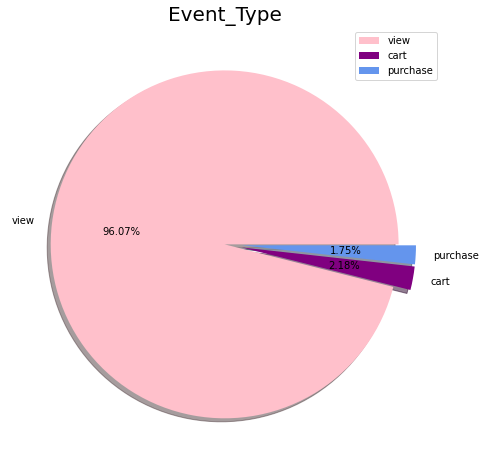

In [2]:
import matplotlib.pyplot as plt

labels = ['view', 'cart', 'purchase']
size = df['event_type'].value_counts()
colors = ['pink', 'purple','cornflowerblue']
explode = [0, 0.1, 0.1]

plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Event_Type', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

In [3]:
df['event_type'].value_counts()

view        40779399
cart          926516
purchase      742849
Name: event_type, dtype: int64

In [21]:
users  = df['user_id'].nunique()
print("Number of users : {}".format(users))

Number of users : 3022290


In [5]:
purchase  = df.loc[df['event_type'] == 'purchase']
purchase = purchase.dropna(axis='rows')

top_brands = purchase.groupby(['brand'])['brand'].agg(['count']).sort_values(by=['count'],ascending=False)
top_brands.head(25) #top 25 brands

,count
brand,
samsung,171706
apple,142577
xiaomi,46595
huawei,23294
oppo,10891
lg,7831
acer,6882
elenberg,5435
indesit,5023


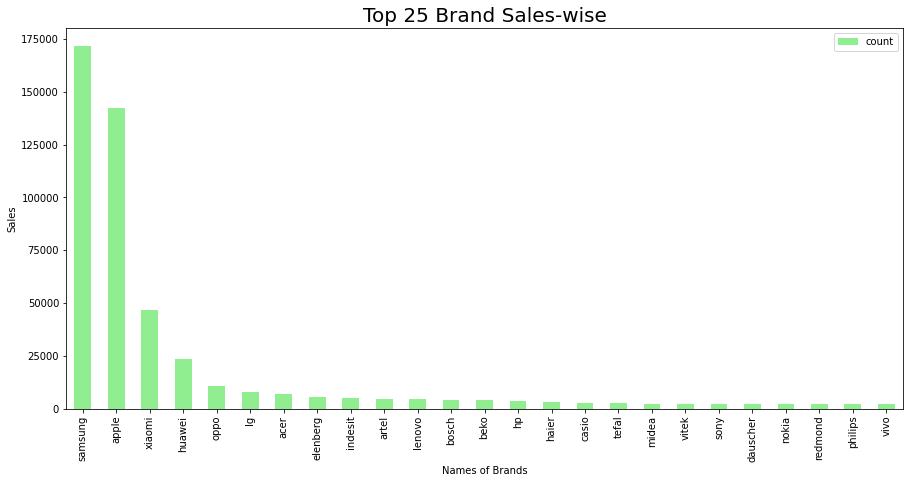

In [6]:
top_brands.head(25).plot.bar(figsize = (15, 7), color = 'lightgreen') #top 25 brands plot
plt.title('Top 25 Brand Sales-wise', fontsize = 20)
plt.xlabel('Names of Brands')
plt.ylabel('Sales')
plt.show()

In [7]:
purchase  = df.loc[df['event_type'] == 'purchase']
purchase = purchase.dropna(axis='rows')

top_category = purchase.groupby(['category_code'])['category_code'].agg(['count']).sort_values(by=['count'],ascending=False)
top_category.head(25) #top 25 categories

,count
category_code,
electronics.smartphone,337575
electronics.audio.headphone,30439
electronics.video.tv,21548
electronics.clocks,16647
appliances.kitchen.washer,16059
computers.notebook,15547
appliances.environment.vacuum,12218
appliances.kitchen.refrigerators,8871
electronics.tablet,5599


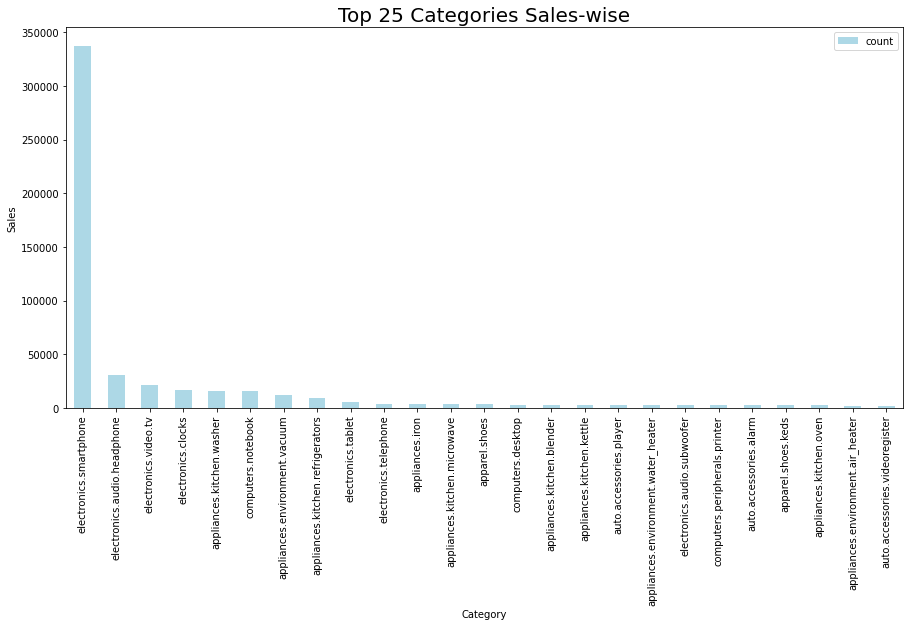

In [8]:
top_category.head(25).plot.bar(figsize = (15, 7), color = 'lightblue') #plot top 25 categories
plt.title('Top 25 Categories Sales-wise', fontsize = 20)
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()

In [17]:
df['event_time']=pd.to_datetime(df['event_time']).dt.tz_convert(None)
df['event_type']=df['event_type'].astype('category')
df['category_code']=df['category_code'].astype('category')

In [18]:
import datetime as dt

daily_summary_table=df.groupby(by=[df['event_time'].dt.normalize()]).agg(Number_of_daily_visits=('user_session',lambda x: x.nunique()),
                                                                                  Number_of_daily_visitors=('user_id',lambda x: x.nunique()))
sales_filter=df['event_type']=='purchase'
sales=df.loc[sales_filter].groupby(by=[df['event_time'].dt.normalize()]).agg(number_of_daily_sales=('event_type','count'),
                                                                                      Total_daily_sales=('price','sum')).reset_index()
daily_summary_table=pd.merge(left=daily_summary_table,
                          right=sales,
                          left_on=['event_time'],
                          right_on=['event_time'],
                          how='left')
daily_summary_table['conversion_rate']=daily_summary_table['number_of_daily_sales']/daily_summary_table['Number_of_daily_visits']

Daily Visits Statistics
count        31.000000
mean     299510.548387
std       25531.553700
min      241086.000000
25%      278957.500000
50%      301219.000000
75%      319668.500000
max      339943.000000
Name: Number_of_daily_visits, dtype: float64
Visit Statistics by Dates
            count       mean           std       min        25%       50%  \
event_time                                                                  
Friday        4.0  321772.50  16017.261304  300651.0  313704.00  325731.0   
Monday        4.0  293353.00  26033.151442  263437.0  276610.00  294346.5   
Saturday      4.0  298041.75  19140.215435  276914.0  286412.75  296976.5   
Sunday        4.0  309080.00  32756.353552  273034.0  285634.75  311671.5   
Thursday      5.0  282820.60  24557.356776  241086.0  281446.00  293587.0   
Tuesday       5.0  301032.40  27672.766817  268737.0  276723.00  308348.0   
Wednesday     5.0  295314.60  27194.956762  261252.0  274906.00  301219.0   

                  75%      

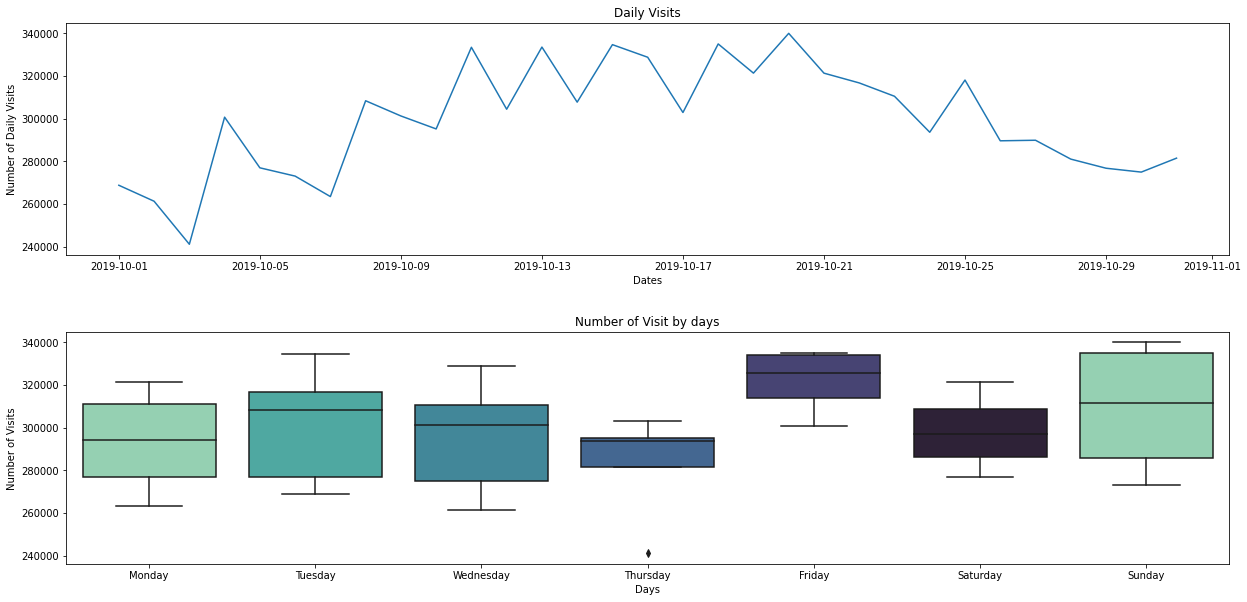

In [31]:
import seaborn as sns
import numpy as np

print('Daily Visits Statistics')
print(daily_summary_table['Number_of_daily_visits'].describe())
print('Visit Statistics by Dates')
print(daily_summary_table.groupby(by=daily_summary_table['event_time'].dt.day_name())['Number_of_daily_visits'].describe())

palette1 = sns.color_palette("mako_r")
#Plotting number of daily visits
fig=plt.figure(figsize=(18,9))
ax1=fig.add_subplot(2,1,1)
sns.lineplot(x='event_time', y='Number_of_daily_visits', data=daily_summary_table, ax=ax1, palette=palette)
plt.title('Daily Visits')
plt.ylabel('Number of Daily Visits')
plt.xlabel('Dates')

ax2=fig.add_subplot(2,1,2)

sns.boxplot(x=daily_summary_table['event_time'].dt.dayofweek, y='Number_of_daily_visits', data=daily_summary_table, ax=ax2, palette=palette1)
plt.title('Number of Visit by days')
plt.ylabel('Number of Visits')
plt.xlabel('Days')
plt.xticks([0, 1, 2,3,4,5,6], ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
fig.tight_layout(pad=3.0);

Daily Visitor Statistics
count        31.000000
mean     208829.774194
std       16233.609920
min      170668.000000
25%      195260.500000
50%      208477.000000
75%      223321.000000
max      231849.000000
Name: Number_of_daily_visitors, dtype: float64
Visitor Statistics by Dates
            count       mean           std       min        25%       50%  \
event_time                                                                  
Friday        4.0  223166.00   9715.295466  209410.0  219796.00  226360.5   
Monday        4.0  204218.00  16732.498877  186951.0  193410.00  202326.0   
Saturday      4.0  205851.25   9731.790975  194958.0  200368.50  205263.5   
Sunday        4.0  213090.00  18707.438325  193210.0  199321.75  213650.5   
Thursday      5.0  197994.80  15736.888740  170668.0  198571.00  205321.0   
Tuesday       5.0  211615.80  18526.041245  190188.0  193168.00  221204.0   
Wednesday     5.0  208073.80  18982.955637  184965.0  191965.00  214140.0   

                  75% 

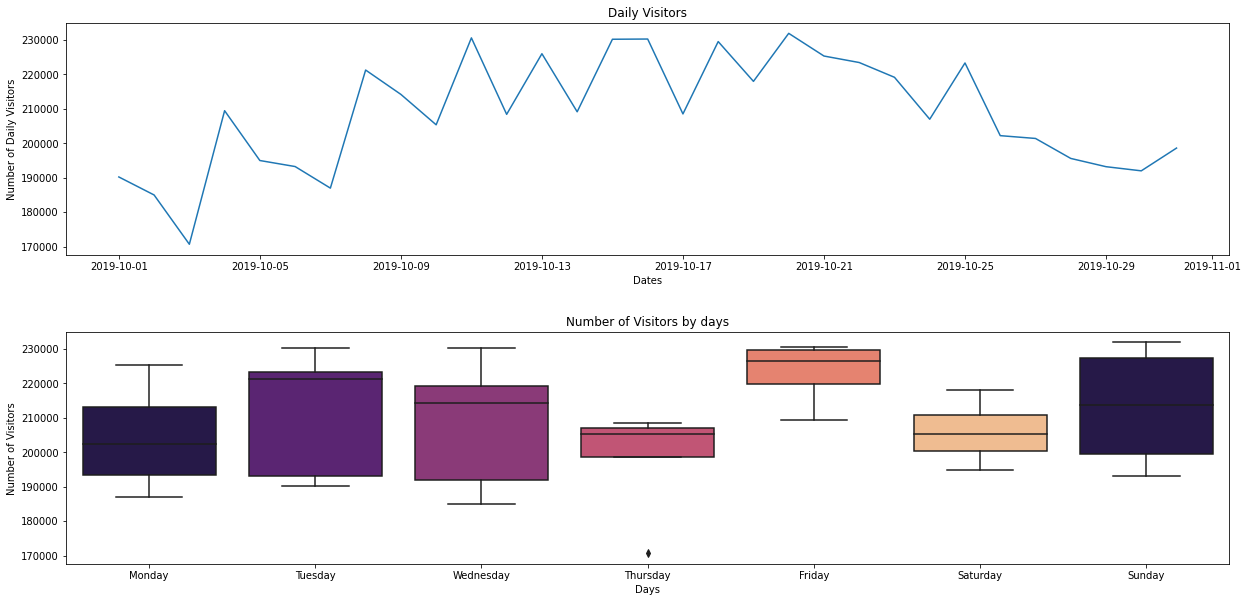

In [34]:
print('Daily Visitor Statistics')
print(daily_summary_table['Number_of_daily_visitors'].describe())
print('Visitor Statistics by Dates')
print(daily_summary_table.groupby(by=daily_summary_table['event_time'].dt.day_name())['Number_of_daily_visitors'].describe())

palette2 = sns.color_palette("magma")

#Plotting number of daily visitors
fig=plt.figure(figsize=(18,9))
ax1=fig.add_subplot(2,1,1)
sns.lineplot(x='event_time', y='Number_of_daily_visitors', data=daily_summary_table, ax=ax1, palette=palette2)
plt.title('Daily Visitors')
plt.ylabel('Number of Daily Visitors')
plt.xlabel('Dates')

ax2=fig.add_subplot(2,1,2)
sns.boxplot(x=daily_summary_table['event_time'].dt.dayofweek, y='Number_of_daily_visitors', data=daily_summary_table, ax=ax2, palette=palette2)
plt.title('Number of Visitors by days')
plt.ylabel('Number of Visitors')
plt.xlabel('Days')
plt.xticks([0, 1, 2,3,4,5,6], ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
fig.tight_layout(pad=3.0);

Conversion Rates Statistics
--------------------------------------------------
count    31.000000
mean      0.079895
std       0.006343
min       0.071413
25%       0.075183
50%       0.078655
75%       0.081473
max       0.095497
Name: conversion_rate, dtype: float64
Conversion Rates Statistics by Dates
            count      mean       std       min       25%       50%       75%  \
event_time                                                                      
Friday        4.0  0.080250  0.006611  0.075235  0.076686  0.077912  0.081476   
Monday        4.0  0.081733  0.007472  0.075131  0.077533  0.079742  0.083942   
Saturday      4.0  0.080793  0.003915  0.076741  0.077856  0.080794  0.083732   
Sunday        4.0  0.081104  0.006049  0.073830  0.079017  0.080974  0.083061   
Thursday      5.0  0.080210  0.008501  0.071413  0.074517  0.079868  0.081744   
Tuesday       5.0  0.075850  0.003511  0.071843  0.073626  0.074825  0.078805   
Wednesday     5.0  0.080185  0.008782  0.07452

Text(0.5, 0, 'Dates')

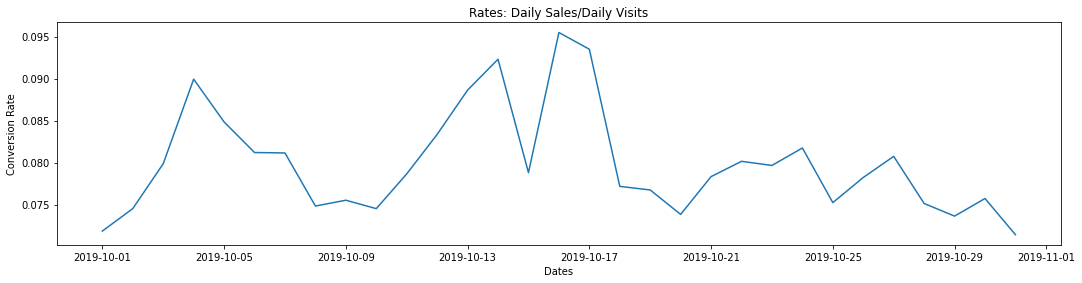

In [40]:
#Conversion rates
print('Conversion Rates Statistics')
print('-'*50)
print(daily_summary_table['conversion_rate'].describe())
print('Conversion Rates Statistics by Dates')
print(daily_summary_table.groupby(by=daily_summary_table['event_time'].dt.day_name())['conversion_rate'].describe())

palette3=sns.color_palette("Spectral")

#Plotting convergance rates
fig=plt.figure(figsize=(18,9))
ax1=fig.add_subplot(2,1,1)
sns.lineplot(x='event_time', y='conversion_rate', data=daily_summary_table, ax=ax1, palette=palette3)
plt.title('Rates: Daily Sales/Daily Visits')
plt.ylabel('Conversion Rate')
plt.xlabel('Dates')